In [72]:
# Credit: Modified from Data8.org

# Importing packages/modules that contain functions will be used below. 
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from urllib.request import urlopen

# make it so that plots are visible in the Jupyter notebook
%matplotlib inline

# Can make the style of the plots look like the website fivethirtyeight
plt.style.use("fivethirtyeight")
plt.style.use("default")

In [20]:
# Read data from two books

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_chapters = urlopen(little_women_url).read().decode().split('CHAPTER ')[1:]

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_chapters = urlopen(huck_finn_url).read().decode().split('CHAPTER ')[1:]


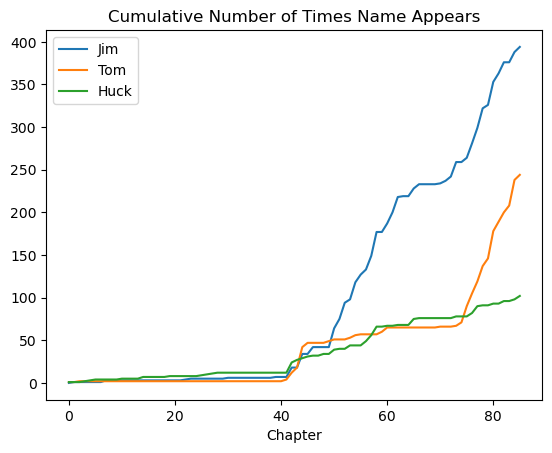

In [73]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

huck_finn_counts = {
    'Jim': np.char.count(huck_finn_chapters, "Jim"),
    'Tom': np.char.count(huck_finn_chapters, "Tom"),
    'Huck': np.char.count(huck_finn_chapters, "Huck"),
}


# plot cumulative number of times names of characters appear
plt.plot(np.cumsum(huck_finn_counts["Jim"]), label = "Jim");
plt.plot(np.cumsum(huck_finn_counts["Tom"]), label = "Tom");
plt.plot(np.cumsum(huck_finn_counts["Huck"]), label = "Huck");
plt.legend();
plt.xlabel("Chapter")
plt.title("Cumulative Number of Times Name Appears");

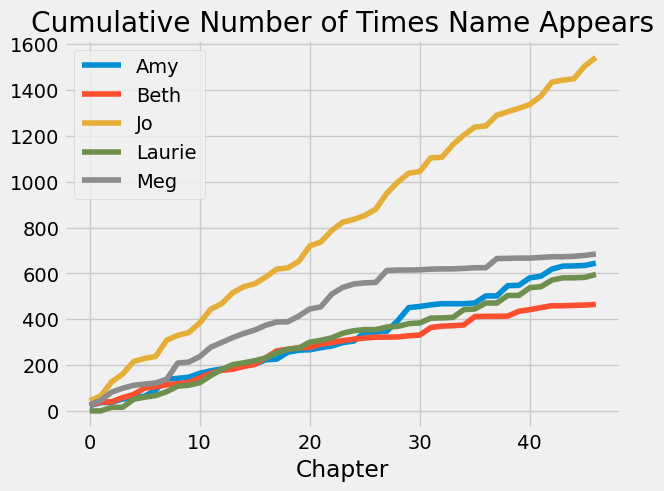

In [49]:
# Counts of names in the chapters of Little Women

for person_name in people:
    curr_person_count = np.char.count(little_women_chapters, person_name)
    plt.plot(np.cumsum(curr_person_count), label = person_name)
    
plt.legend();
plt.xlabel("Chapter")
plt.title("Cumulative Number of Times Name Appears");

In [67]:
huck_finn_df = pl.DataFrame(
    {
        'Chapter': range(len(huck_finn_chapters)),
        'Periods': np.char.count(huck_finn_chapters, '.'),
        'Spaces': np.char.count(huck_finn_chapters, ' '),
        'Characters': [huck_finn_chapters[i].count('') for i in range(len(huck_finn_chapters))], 
        'Words': [len(s) for s in huck_finn_chapters],
     }
)

print(huck_finn_df.head())


little_women_df = pl.DataFrame(
    {
        'Chapter': range(len(little_women_chapters)),
        'Periods': np.char.count(little_women_chapters, '.'),
        'Spaces': np.char.count(little_women_chapters, ' '),
        'Characters': [little_women_chapters[i].count('') for i in range(len(little_women_chapters))], 
        'Words': [len(s) for s in little_women_chapters],
     }
)

little_women_df.head()




shape: (5, 5)
┌─────────┬─────────┬────────┬────────────┬───────┐
│ Chapter ┆ Periods ┆ Spaces ┆ Characters ┆ Words │
│ ---     ┆ ---     ┆ ---    ┆ ---        ┆ ---   │
│ i64     ┆ i64     ┆ i64    ┆ i64        ┆ i64   │
╞═════════╪═════════╪════════╪════════════╪═══════╡
│ 0       ┆ 4       ┆ 5      ┆ 57         ┆ 56    │
│ 1       ┆ 4       ┆ 7      ┆ 68         ┆ 67    │
│ 2       ┆ 4       ┆ 7      ┆ 78         ┆ 77    │
│ 3       ┆ 3       ┆ 4      ┆ 43         ┆ 42    │
│ 4       ┆ 4       ┆ 4      ┆ 49         ┆ 48    │
└─────────┴─────────┴────────┴────────────┴───────┘


Chapter,Periods,Spaces,Characters,Words
i64,i64,i64,i64,i64
0,189,3839,22409,22408
1,188,3850,22828,22827
2,231,3671,21296,21295
3,195,4448,26166,26165
4,255,4153,24200,24199


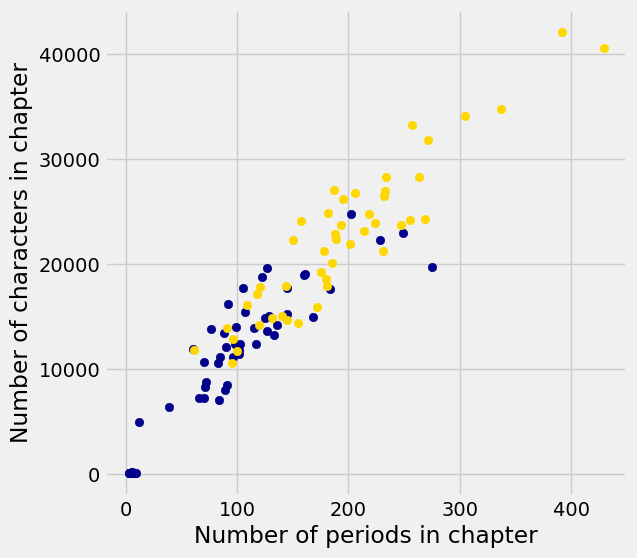

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(huck_finn_df["Periods"], huck_finn_df["Characters"], color='darkblue')
plt.scatter(little_women_df["Periods"], little_women_df["Characters"], color='gold')
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');